In [29]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, concatenate_datasets

mod_tax = 10
mod_order = 5
train_size = 0.7
test_size = 0.2 


## create Dataset

In [30]:
dataset = load_dataset("/home/sebastian/Documents/Hauptprojekt/Daten_sorted")

Resolving data files:   0%|          | 0/107394 [00:00<?, ?it/s]

In [31]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 107394
    })
})

In [32]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}


train_datasets, test_datasets = [], []

In [33]:
def check_label(examples, label_index):
    booleans = []
    for label in examples['label']:
        try:
            if label == label_index:
                booleans.append(True)
            else:
                booleans.append(False)
        except:
            booleans.append(False)

    return booleans

# for each class: filter the dataset on documents with that class
# and then use the first 10 for training, and the last 10 for testing
for id in id2label.keys():
    # filter dataset on particular label
    filtered_dataset = dataset.filter(check_label, fn_kwargs={'label_index':id}, batched=True)
    
    if id == 2:
        mod5len = int(filtered_dataset["train"].num_rows*(1/mod_order))            
        mod5trainlen = int(mod5len*train_size)
        filted_train_dataset = filtered_dataset["train"].select(range(mod5trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(mod5trainlen, int(mod5len*0.9)))
        test_datasets.append(filted_test_dataset)
        print(mod5trainlen)
                      
    elif id == 7:
        mod10len = int(filtered_dataset["train"].num_rows*(1/mod_tax))
        mod10trainlen = int(mod10len*train_size)
        filted_train_dataset = filtered_dataset["train"].select(range(mod10trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(mod10trainlen, int(mod10len*0.9)))
        test_datasets.append(filted_test_dataset)
        print(mod10trainlen)
    else:    
        trainlen = int(filtered_dataset["train"].num_rows*train_size)
        totallen = int(filtered_dataset["train"].num_rows)
        # select first 10 examples for training
        filted_train_dataset = filtered_dataset["train"].select(range(trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(trainlen, int(totallen*0.9)))
        test_datasets.append(filted_test_dataset)
        print(trainlen)

24
4
3924
23
2217
784
1485
5099
12


In [35]:
train_datasets

[Dataset({
     features: ['image', 'label'],
     num_rows: 24
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 4
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 3924
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 23
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 2217
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 784
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 1485
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 5099
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 12
 })]

In [36]:
toy_dataset = DatasetDict({"train": concatenate_datasets(train_datasets),
                           "test": concatenate_datasets(test_datasets)
                           })

In [39]:
toy_dataset["train"][10000]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1875x2339>,
 'label': 7}

In [40]:
# note that, in case you use the private hub, you can just add `private=True`
toy_dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_10_5", private=True)

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/8 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1940 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

In [41]:
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_10_5")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/3879 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/13572 [00:00<?, ? examples/s]

In [42]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 3879
    })
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 13572
    })
})

## Prepare Donut format

In [43]:
template = '{"gt_parse": {"class" : '

In [44]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}


def update_examples(examples):
    ground_truths = []
    for label in examples['label']:
        ground_truths.append(template + '"' + id2label[label] + '"' + "}}")

    examples['ground_truth'] = ground_truths

    return examples

dataset = dataset.map(update_examples, batched=True)
     

Map:   0%|          | 0/3879 [00:00<?, ? examples/s]

Map:   0%|          | 0/13572 [00:00<?, ? examples/s]

In [47]:
test = dataset['train'][5000]['ground_truth']
test

'{"gt_parse": {"class" : "purchase_order"}}'

In [48]:
from ast import literal_eval

test2 = literal_eval(test)
test2['gt_parse']

{'class': 'purchase_order'}

In [49]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 3879
    })
    train: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 13572
    })
})

In [50]:
dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", private=True)

Map:   0%|          | 0/1940 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/7 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1938 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

## Load dataset

In [51]:
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/3879 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/13572 [00:00<?, ? examples/s]

In [52]:
id2label = {id: label for id, label in enumerate(dataset['train'].features['label'].names)}
print(id2label)

{0: 'credit_note', 1: 'debit_note', 2: 'order', 3: 'proforma', 4: 'purchase_order', 5: 'receipt', 6: 'sales_order', 7: 'tax_invoice', 8: 'utility_bill'}


In [53]:
example = dataset["train"][0]
example["ground_truth"]

'{"gt_parse": {"class" : "credit_note"}}'

In [54]:
from ast import literal_eval

literal_eval(example["ground_truth"])['gt_parse']

{'class': 'credit_note'}

In [55]:
from transformers import VisionEncoderDecoderConfig

max_length = 8
# image_size = [2560, 1920]
# let's use a smaller image size (height, width) because otherwise OOM
# the higher the resolution, the better the results will be
# so if you have a big GPU, feel free to increase
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("nielsr/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

In [56]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

processor = DonutProcessor.from_pretrained("nielsr/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("nielsr/donut-base", config=config)

2023-09-05 02:44:27.510500: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-05 02:44:27.541008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 02:44:27.952672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [57]:
# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# source: https://github.com/clovaai/donut/blob/master/config/train_cord.yaml
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/models/donut/processing_donut.py:189: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [58]:
len(processor.tokenizer)

57525

In [59]:
from typing import List

def add_tokens(list_of_tokens: List[str]):
    """
    Add tokens to tokenizer and resize the token embeddings
    """
    newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
    if newly_added_num > 0:
        model.decoder.resize_token_embeddings(len(processor.tokenizer))

In [60]:
additional_tokens = ["<credit_note/>", "<debit_note/>", "<order/>", "<proforma/>", "<purchase_order/>", 
                     "<receipt/>", "<sales_order/>", "<tax_invoice/>", "<utility_bill/>"]


add_tokens(additional_tokens)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57534. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [61]:
processor.tokenizer.convert_tokens_to_ids(["<order/>"])

[57527]

In [62]:
len(processor.tokenizer)

57534

In [63]:
import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row, consists of image path(png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor(vectorized image) and input_ids(tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "<s>",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)

    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
        """
        Convert an ordered JSON object into a token sequence
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                        + fr"</s_{k}>"
                    )
                return output
        elif type(obj) == list:
            return r"<sep/>".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in additional_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj
    
    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add tokens to tokenizer and resize the token embeddings of the decoder
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))
    
    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels
        Convert gt data into input_ids (tokenized string)
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token)
        """
        sample = self.dataset[idx]

        # pixel values (we remove the batch dimension)
        pixel_values = processor(sample["image"].convert("RGB"), random_padding=self.split == "train", return_tensors="pt").pixel_values
        pixel_values = pixel_values.squeeze()

        # labels, which are the input ids of the target sequence
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            target_sequence,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # model doesn't need to predict pad token
        # labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # model doesn't need to predict prompt (for VQA)
        
        encoding = dict(pixel_values=pixel_values,
                        labels=labels)
        
        return encoding

In [64]:
dataset["train"]

Dataset({
    features: ['image', 'label', 'ground_truth'],
    num_rows: 13572
})

In [65]:
train_dataset = DonutDataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", max_length=max_length,
                             split="train", task_start_token="<s_docile>", prompt_end_token="<s_docile>",
                             sort_json_key=False, # rvlcdip dataset is preprocessed, so no need for this
                             )

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57536. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57537. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [66]:
train_dataset[0]

{'pixel_values': tensor([[[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]),
 'labels': tensor([57534, 57525, 57535,     2,  -100,  -100,  -100

## Create Dataloader

In [67]:
from torch.utils.data import DataLoader

# using batch_size > 3 gives Cuda out of Memory error
train_dataloader = DataLoader(train_dataset, batch_size=3, shuffle=True)

In [68]:
batch = next(iter(train_dataloader))
print(batch.keys())

dict_keys(['pixel_values', 'labels'])


In [69]:
for id in batch['labels'][0].tolist():
    if id != -100:
        print(processor.decode([id]))
    else:
        print(id)

<s_class>
<sales_order/>
</s_class>
</s>
-100
-100
-100
-100


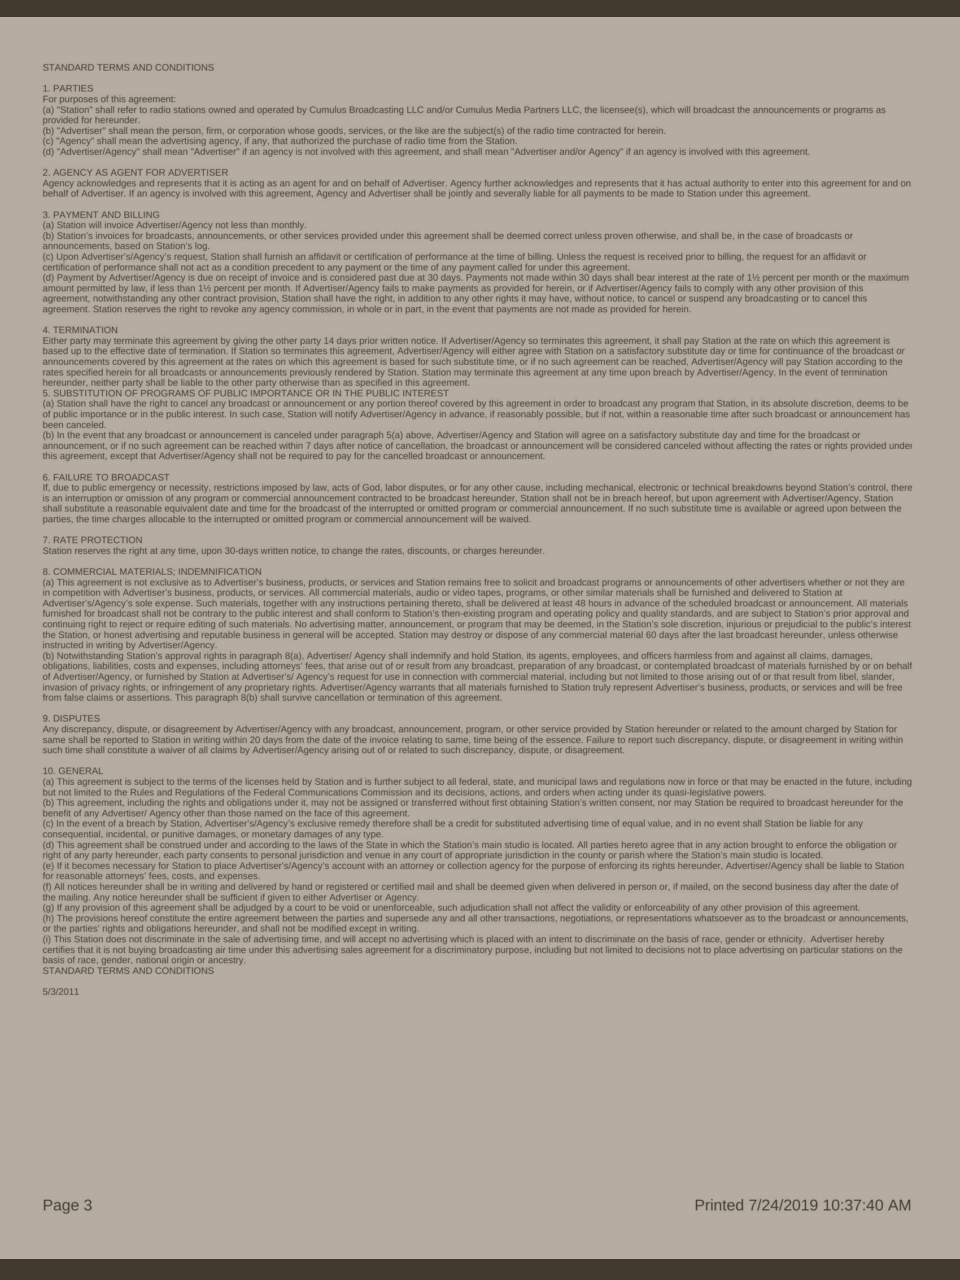

In [70]:
from PIL import Image
import numpy as np

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# unnormalize
reconstructed_image = (batch['pixel_values'][0] * torch.tensor(std)[:, None, None]) + torch.tensor(mean)[:, None, None]
# unrescale
reconstructed_image = reconstructed_image * 255
# convert to numpy of shape HWC
reconstructed_image = torch.moveaxis(reconstructed_image, 0, -1)
image = Image.fromarray(reconstructed_image.numpy().astype(np.uint8))
image

## Train the model 

In [71]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s_docile>'])[0]

In [72]:
# sanity check
print("Pad token ID:", processor.decode([model.config.pad_token_id]))
print("Decoder start token ID:", processor.decode([model.config.decoder_start_token_id]))

Pad token ID: <pad>
Decoder start token ID: <s_docile>


In [73]:
import torch
from tqdm.auto import tqdm

epochs = 10

device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)

for epoch in range(epochs):
    print("Epoch:", epoch+1)  
    model.train()
    for i, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]
        #print(pixel_values)
        #print(labels)
        outputs = model(pixel_values=pixel_values,
                        labels=labels)
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print("Loss:", loss.item())
    if (epoch+1) % 5 == 0:
        model.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5_" + str(epoch+1), private=True)

Epoch: 1


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 20.774057388305664
Loss: 0.8734585642814636
Loss: 0.3679293394088745
Loss: 0.17214854061603546
Loss: 0.32054027915000916
Loss: 0.05305759608745575
Loss: 0.37778082489967346
Loss: 0.042495954781770706
Loss: 0.00800545047968626
Loss: 0.36251330375671387
Loss: 0.013139866292476654
Loss: 0.013609473593533039
Loss: 0.054161619395017624
Loss: 0.001251468900591135
Loss: 0.020982244983315468
Loss: 0.0013023591600358486
Loss: 0.007365029770880938
Loss: 0.0011677563888952136
Loss: 0.010426275432109833
Loss: 0.044178321957588196
Loss: 0.0031665463466197252
Loss: 0.0008468574960716069
Loss: 0.07591434568166733
Loss: 0.036868561059236526
Loss: 0.005905758589506149
Loss: 0.00675779627636075
Loss: 0.02888706885278225
Loss: 0.043324634432792664
Loss: 0.001071603037416935
Loss: 0.004672508221119642
Loss: 0.0007457679021172225
Loss: 0.0004889330011792481
Loss: 0.0009086166392080486
Loss: 0.007903657853603363
Loss: 0.0010094760218635201
Loss: 0.0010037225438281894
Loss: 0.02749425172805786
Loss: 0.

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0030929080676287413
Loss: 0.0013681600103154778
Loss: 0.00020846469851676375
Loss: 0.0001851362903835252
Loss: 0.00031731397029943764
Loss: 0.0025746445171535015
Loss: 0.00043509891838766634
Loss: 0.0005024794372729957
Loss: 0.004293239675462246
Loss: 0.00032775974250398576
Loss: 0.0008632258395664394
Loss: 0.022617757320404053
Loss: 0.002695708768442273
Loss: 0.0012864171294495463
Loss: 0.014482736587524414
Loss: 0.0013045516097918153
Loss: 0.002649511443451047
Loss: 0.017646318301558495
Loss: 0.0044000474736094475
Loss: 0.0035308811347931623
Loss: 0.00034989588311873376
Loss: 0.031192736700177193
Loss: 0.005703783128410578
Loss: 0.11043965071439743
Loss: 0.0002004895213758573
Loss: 0.0015042800223454833
Loss: 0.0014155622338876128
Loss: 0.0005982992588542402
Loss: 0.000376582465833053
Loss: 0.0013753221137449145
Loss: 0.09222117811441422
Loss: 0.0007179733947850764
Loss: 0.000753661326598376
Loss: 0.00043478168663568795
Loss: 0.0003275604685768485
Loss: 0.0075890603475272655


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.057413797825574875
Loss: 0.0002789644058793783
Loss: 0.0008128881454467773
Loss: 0.5419533848762512
Loss: 0.0009176813182421029
Loss: 0.00631406856700778
Loss: 0.004273445811122656
Loss: 0.0002675804717000574
Loss: 0.007036466617137194
Loss: 0.002020258456468582
Loss: 0.0006506944773718715
Loss: 0.00335327279753983
Loss: 0.00022225052816793323
Loss: 0.0024890813510864973
Loss: 0.00020739751926157624
Loss: 0.0006752950139343739
Loss: 0.0005952886422164738
Loss: 0.004217957146465778
Loss: 0.0006229352438822389
Loss: 4.100233127246611e-05
Loss: 0.00016311094805132598
Loss: 9.772515477379784e-05
Loss: 0.00632605841383338
Loss: 0.0008830108563415706
Loss: 0.00018111144891008735
Loss: 0.014848588965833187
Loss: 0.005134487524628639
Loss: 7.336740964092314e-05
Loss: 0.22911317646503448
Loss: 0.08334804326295853
Loss: 0.0060509853065013885
Loss: 0.03591680899262428
Loss: 0.0001944383402587846
Loss: 0.0018349414458498359
Loss: 6.129248049546732e-06
Loss: 0.0010102296946570277
Loss: 0.00

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 2.2559261196875013e-05
Loss: 7.313719106605276e-05
Loss: 2.8925207516294904e-05
Loss: 0.0005820419755764306
Loss: 5.9037574828835204e-05
Loss: 0.008475434966385365
Loss: 0.0004949269932694733
Loss: 3.918561196769588e-05
Loss: 0.000319830171065405
Loss: 0.0032646702602505684
Loss: 0.00014165030734147877
Loss: 0.0006525944918394089
Loss: 0.00018678589549381286
Loss: 4.261667527316604e-06
Loss: 0.0006668868591077626
Loss: 0.00012671177682932466
Loss: 0.00018880855350289494
Loss: 0.0012311360333114862
Loss: 0.04975500330328941
Loss: 0.00027790397871285677
Loss: 0.0006226549739949405
Loss: 0.00041281324229203165
Loss: 8.060186519287527e-05
Loss: 0.006545547861605883
Loss: 0.0006904014735482633
Loss: 0.0004295830149203539
Loss: 0.00010886103700613603
Loss: 0.00019852664263453335
Loss: 4.394333518575877e-05
Loss: 4.393250492285006e-05
Loss: 0.27872908115386963
Loss: 1.4165691936796065e-05
Loss: 5.328176848706789e-05
Loss: 0.0016206909203901887
Loss: 0.005149867385625839
Loss: 0.00133100

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0011901594698429108
Loss: 0.00034369868808425963
Loss: 0.0006866335752420127
Loss: 5.274002251098864e-05
Loss: 0.00042109633795917034
Loss: 0.006063827779144049
Loss: 1.4711374205944594e-05
Loss: 3.4248620067955926e-05
Loss: 0.29757630825042725
Loss: 0.00042220731847919524
Loss: 0.0060897632502019405
Loss: 0.0003165311354678124
Loss: 0.0012422093423083425
Loss: 1.4572867257811595e-05
Loss: 0.002216461580246687
Loss: 0.0005146461771801114
Loss: 0.014001729898154736
Loss: 0.0005362521042115986
Loss: 0.0038002768997102976
Loss: 0.0002455776557326317
Loss: 7.704935705987737e-05
Loss: 0.024892209097743034
Loss: 0.00021767150610685349
Loss: 0.12844409048557281
Loss: 0.015394815243780613
Loss: 0.008826973848044872
Loss: 1.7840542568592355e-05
Loss: 0.013978284783661366
Loss: 0.002111859153956175
Loss: 0.013075652532279491
Loss: 0.015661543235182762
Loss: 8.831196282699239e-06
Loss: 0.0006545642390847206
Loss: 0.0006941148894838989
Loss: 0.009700912050902843
Loss: 0.0001866711972979828

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Epoch: 6


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0007138834334909916
Loss: 0.001918099238537252
Loss: 7.59689137339592e-05
Loss: 0.00023981988488230854
Loss: 0.000491583370603621
Loss: 0.00022938552137929946
Loss: 0.0004261134599801153
Loss: 4.847805485042045e-06
Loss: 0.00028666865546256304
Loss: 0.049867257475852966
Loss: 7.17995862942189e-05
Loss: 1.392664580635028e-05
Loss: 0.0011220623273402452
Loss: 0.00023338240862358361
Loss: 0.00012021631118841469
Loss: 0.0006565989460796118
Loss: 9.118208981817588e-05
Loss: 1.3062958714726847e-05
Loss: 0.00012952348333783448
Loss: 0.003913714084774256
Loss: 0.00018517895659897476
Loss: 0.0001762261235853657
Loss: 7.708898920100182e-05
Loss: 0.00028350326465442777
Loss: 0.000502832408528775
Loss: 3.0503339075949043e-05
Loss: 7.318026473512873e-05
Loss: 4.762134994962253e-05
Loss: 0.000313622469548136
Loss: 0.0001367390650557354
Loss: 0.0034016829449683428
Loss: 0.012647982686758041
Loss: 0.00025249781901948154
Loss: 2.587658127595205e-05
Loss: 0.003075346117839217
Loss: 0.00146746262

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.00014516926603391767
Loss: 0.0027368224691599607
Loss: 0.00040205600089393556
Loss: 9.298076292907353e-06
Loss: 0.00394330034032464
Loss: 0.0017837147461250424
Loss: 0.00010992452007485554
Loss: 7.630367326783016e-05
Loss: 0.0004599090025294572
Loss: 2.4227781977970153e-05
Loss: 0.3692961037158966
Loss: 4.185739453532733e-05
Loss: 0.0008484593126922846
Loss: 0.0002564342867117375
Loss: 0.0002789477293845266
Loss: 0.0001051612853188999
Loss: 0.00040388235356658697
Loss: 3.277780706412159e-05
Loss: 2.4575158022344112e-05
Loss: 7.281584203155944e-06
Loss: 0.00018356107466388494
Loss: 7.102675681380788e-06
Loss: 0.0005661463947035372
Loss: 8.605150651419535e-05
Loss: 0.00017246014613192528
Loss: 0.00045997483539395034
Loss: 0.0013934426242485642
Loss: 0.0005375382024794817
Loss: 3.6374440242070705e-05
Loss: 0.0009566976223140955
Loss: 0.00011386660480638966
Loss: 0.0003628590202424675
Loss: 6.5266081037407275e-06
Loss: 2.016616463151877e-06
Loss: 9.649380808696151e-05
Loss: 3.49648

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0003799390105996281
Loss: 4.698760676546954e-06
Loss: 1.1920908491447335e-06
Loss: 0.01722639985382557
Loss: 2.440472053422127e-05
Loss: 0.00047069924767129123
Loss: 7.196766091510653e-05
Loss: 0.00013474439037963748
Loss: 1.132483703258913e-06
Loss: 0.011592141352593899
Loss: 6.85452675952547e-07
Loss: 1.2804573088942561e-05
Loss: 0.0004264461749698967
Loss: 0.022594133391976357
Loss: 3.04839268210344e-05
Loss: 0.00010816130816238001
Loss: 8.145933065861755e-07
Loss: 1.1622868214544724e-06
Loss: 1.8874630995924235e-06
Loss: 2.1534482584684156e-05
Loss: 5.036476068198681e-06
Loss: 0.00039626334910281
Loss: 0.7546955943107605
Loss: 0.0004544976691249758
Loss: 0.000160469877300784
Loss: 5.532344584935345e-05
Loss: 0.00018849516345653683
Loss: 3.476932306512026e-07
Loss: 0.00013339663564693183
Loss: 0.0001619526738068089
Loss: 1.6340369256795384e-05
Loss: 8.81990126799792e-05
Loss: 0.00016927230171859264
Loss: 0.0004628689493983984
Loss: 0.00016933184815570712
Loss: 7.947255653562

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 4.3311729314154945e-06
Loss: 2.771588697214611e-06
Loss: 0.010135157965123653
Loss: 0.002844282193109393
Loss: 0.0005897175287827849
Loss: 0.0006073746480979025
Loss: 1.9389792214496993e-05
Loss: 0.001641829963773489
Loss: 6.442312587751076e-05
Loss: 0.043966103345155716
Loss: 0.09657417982816696
Loss: 4.731290755444206e-05
Loss: 0.48113980889320374
Loss: 0.004788654390722513
Loss: 0.0021166575606912374
Loss: 0.005092435050755739
Loss: 0.0046259621158242226
Loss: 9.735059393278789e-06
Loss: 0.03685322776436806
Loss: 4.162349341640947e-06
Loss: 4.470342958029505e-07
Loss: 3.9338615351880435e-06
Loss: 0.001477699144743383
Loss: 2.5828301204455784e-06
Loss: 3.946001743315719e-05
Loss: 4.4391301344148815e-05
Loss: 0.0001917052868520841
Loss: 9.141072951024398e-05
Loss: 0.3615466356277466
Loss: 0.14397574961185455
Loss: 0.0004949456197209656
Loss: 0.0001758005964802578
Loss: 0.00037189145223237574
Loss: 0.00926091056317091
Loss: 3.0199510092643322e-06
Loss: 1.3271200259623583e-05
Loss

  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 9.138958375842776e-06
Loss: 0.005348293110728264
Loss: 3.0273715310613625e-05
Loss: 7.185286813182756e-05
Loss: 0.0005882532568648458
Loss: 2.781520151984296e-06
Loss: 1.363844330626307e-05
Loss: 0.0001040020797518082
Loss: 1.2188273103674874e-05
Loss: 9.089239028980955e-06
Loss: 1.338017318630591e-05
Loss: 2.572907760622911e-06
Loss: 1.121521654567914e-05
Loss: 0.0007779810694046319
Loss: 0.0001862144417827949
Loss: 0.0005882505211047828
Loss: 1.9768651782214874e-06
Loss: 5.88081138630514e-06
Loss: 9.049163782037795e-05
Loss: 0.00014809350250288844
Loss: 5.4351563449017704e-05
Loss: 0.0006523237680085003
Loss: 5.9940299252048135e-05
Loss: 0.0010878093307837844
Loss: 0.00014248279330786318
Loss: 1.001312648440944e-05
Loss: 0.00011527218157425523
Loss: 0.0023292009718716145
Loss: 2.582865761269204e-07
Loss: 6.655709512415342e-06
Loss: 2.09784757316811e-05
Loss: 0.0008142234291881323
Loss: 0.033460602164268494
Loss: 8.006666575965937e-06
Loss: 0.08083230257034302
Loss: 2.7815457315

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

## evaluate

In [108]:
import re
#model = model = VisionEncoderDecoderModel.from_pretrained("ZaNioxX/DocILE_10_5_ImageClassification_donut_10")

model.eval()

dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", split="test")

output_list = []
real = []
accs = []
for idx, sample in tqdm(enumerate(dataset), total=len(dataset)):
    # prepare encoder inputs
    pixel_values = processor(sample["image"].convert("RGB"), return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    # prepare decoder inputs
    task_prompt = "<s_docile>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    decoder_input_ids = decoder_input_ids.to(device)
    
    # autoregressively generate sequence
    outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_input_ids,
            max_length=model.decoder.config.max_position_embeddings,
            early_stopping=True,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

    # turn into JSON
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    seq = processor.token2json(seq)

    ground_truth = json.loads(sample["ground_truth"])
    gt = ground_truth["gt_parse"]
    score = float(seq["class"] == gt["class"])

    accs.append(score)
    real.append(gt["class"])
    output_list.append(seq["class"])

scores = {"accuracies": accs, "mean_accuracy": np.mean(accs)}
print(scores, f"length : {len(accs)}")

  0%|          | 0/3879 [00:00<?, ?it/s]

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:399: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


{'accuracies': [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

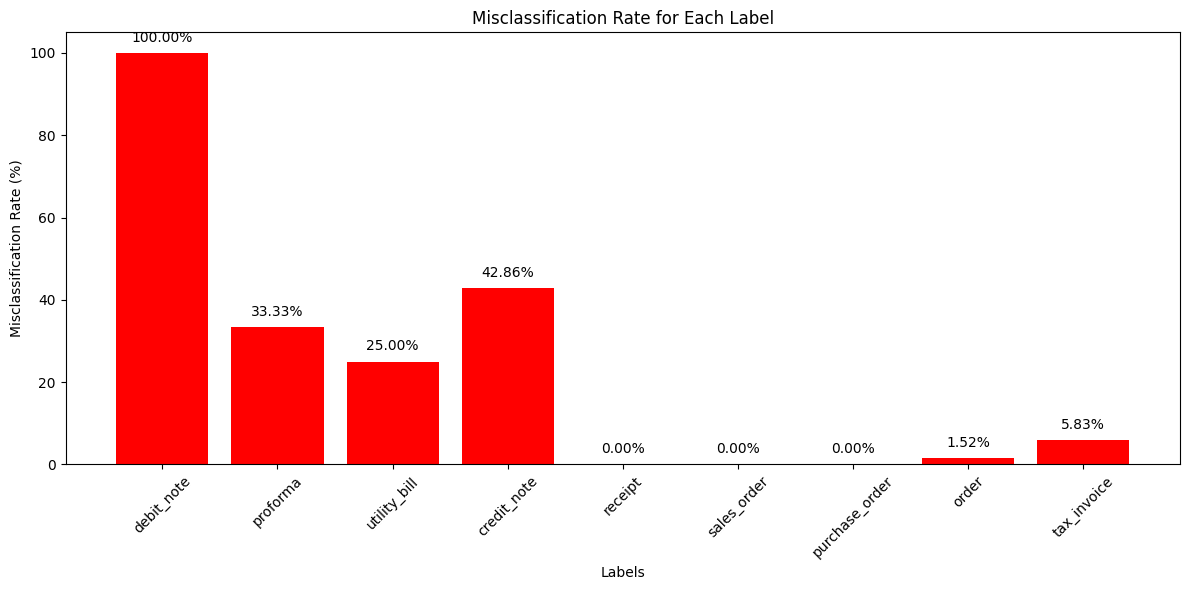

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Define the custom order for labels
custom_order = [
    "debit_note",
    "proforma",
    "utility_bill",
    "credit_note",
    "receipt",
    "sales_order",
    "purchase_order",
    "order",
    "tax_invoice"
]

# Create a dictionary to store the counts of each label
label_counts = {label: real.count(label) for label in set(real)}

# Initialize a dictionary to store the count of correct predictions for each label
correct_counts = {label: 0 for label in set(real)}

# Count the correct predictions for each label
for r, o in zip(real, output_list):
    if r == o:
        correct_counts[r] += 1

# Calculate the misclassification rate (percentage of wrong classifications) for each label
misclassification_per_label = {label: (1 - (correct_counts[label] / label_counts[label])) * 100 if label_counts[label] > 0 else 0 for label in custom_order}

# Create a list of labels and corresponding misclassification percentages
labels = [label for label in custom_order]
misclassification_values = [misclassification_per_label[label] for label in custom_order]

# Create a bar plot with custom ordering
plt.figure(figsize=(12, 6))
plt.bar(labels, misclassification_values, color='red')
plt.xlabel('Labels')
plt.ylabel('Misclassification Rate (%)')
plt.title('Misclassification Rate for Each Label')
plt.xticks(rotation=45)

# Display the misclassification percentage above each bar, with adjusted vertical alignment
for i, misclassification in enumerate(misclassification_values):
    plt.text(i, misclassification + 2, f'{misclassification:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/Classification_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()

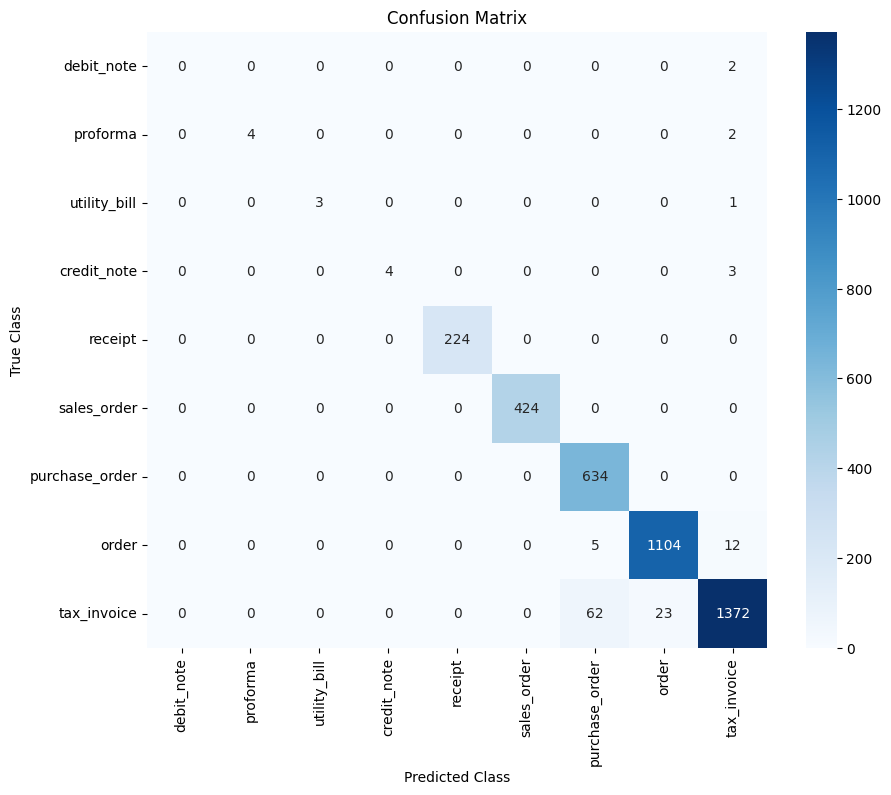

In [110]:
### from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the label mapping
label_mapping = {'debit_note': 0, 'proforma': 1, 'utility_bill': 2, 'credit_note': 3, 'receipt': 4, 'sales_order': 5, 'purchase_order': 6, 'order': 7, 'tax_invoice': 8}

# Map labels to integers
real_int = [label_mapping[label] for label in real]
output_int = [label_mapping[label] for label in output_list]

# Create the confusion matrix
conf_matrix = confusion_matrix(real_int, output_int)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=list(label_mapping.keys()), columns=list(label_mapping.keys()))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()


In [77]:
print(real)

['credit_note', 'credit_note', 'credit_note', 'credit_note', 'credit_note', 'credit_note', 'credit_note', 'debit_note', 'debit_note', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'o

In [101]:
print(output_list)

['tax_invoice', 'tax_invoice', 'credit_note', 'credit_note', 'credit_note', 'credit_note', 'tax_invoice', 'tax_invoice', 'tax_invoice', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 'order', 

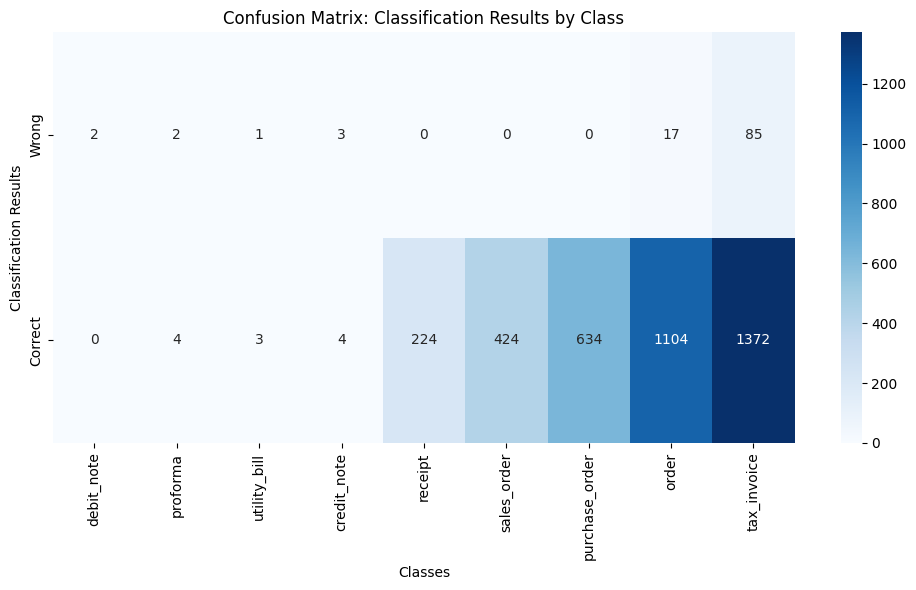

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define categories and data
categories = [
    "debit_note",
    "proforma",
    "utility_bill",
    "credit_note",
    "receipt",
    "sales_order",
    "purchase_order",
    "order",
    "tax_invoice"
]

# Calculate the confusion matrix
conf_matrix = np.zeros((2, len(categories)))  # Initialize a matrix for wrong (0) and correct (1) classifications

for i, category in enumerate(categories):
    for r, o in zip(real, output_list):
        if r == category and o == category:
            conf_matrix[1, i] += 1  # Correct classification
        elif r == category and o != category:
            conf_matrix[0, i] += 1  # Wrong classification

# Create a confusion matrix heatmap using Seaborn with switched axes
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=categories, yticklabels=['Wrong', 'Correct'])
plt.xlabel('Classes')
plt.ylabel('Classification Results')
plt.title('Confusion Matrix: Classification Results by Class')
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_2_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()
